# 🚜 Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem defition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features
Features are different parts and attributes of the data. 

During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this is to create a **data dictionary**.

For this dataset, Kaggle provides a data dictionary which contains information about what each attribute of the dataset means. 

For example: 

| Variable Name | Description  | Variable Type |
|------|-----|-----|
| SalesID   | unique identifier of a particular sale of a machine at auction  | Independent  variable |
| MachineID  | identifier for a particular machine; machines may have multiple sales  | Independent  variable |
| ModelID | identifier for a unique machine model (i.e. fiModelDesc) | Independent  variable |
| datasource  | source of the sale record; some sources are more diligent about reporting attributes of the machine than others. Note that a particular datasource may report on multiple auctioneerIDs. | Independent  variable |
| auctioneerID  | identifier of a particular auctioneer, i.e. company that sold the machine at auction. Not the same as datasource.  | Independent  variable |
| YearMade  | year of manufacturer of the Machine  | Independent  variable |
| MachineHoursCurrentMeter | current usage of the machine in hours at time of sale (saledate); null or 0 means no hours have been reported for that sale | Independent  variable |
| UsageBand | value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel; e.g. 'Low' means this machine has fewer hours given its lifespan relative to the average of fiBaseModel. | Independent  variable |
| Saledate   | time of sale | Independent  variable |
| fiModelDesc  | Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc & fiModelSeries & fiModelDescriptor  | Independent  variable |
| State | US State in which sale occurred | Independent  variable |
| Drive_System | machine configuration; typically describes whether 2 or 4 wheel drive  | Independent  variable |
| Enclosure  | machine configuration - does the machine have an enclosed cab or not | Independent  variable |
| Forks  | machine configuration - attachment used for lifting  | Independent  variable |
| Pad_Type | machine configuration - type of treads a crawler machine uses | Independent  variable |
| Ride_Control  | machine configuration - optional feature on loaders to make the ride smoother | Independent  variable |
| Transmission | machine configuration - describes type of transmission; typically automatic or manual | Independent  variable |
| ... | ... | ... |
| SalePrice | cost of sale in USD | Target/dependent variable | 

You can download the full version of this file directly from the [Kaggle competition page](https://www.kaggle.com/c/bluebook-for-bulldozers/download/Bnl6RAHA0enbg0UfAvGA%2Fversions%2FwBG4f35Q8mAbfkzwCeZn%2Ffiles%2FData%20Dictionary.xlsx) (Kaggle account required) or view it [on Google Sheets](https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing).

With all of this being known, let's get started! 

First, we'll import the dataset and start exploring. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn

# Print the versions we're using (as long as your versions are equal or higher than these, the code should work)
print(f"pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")

pandas version: 2.3.1
NumPy version: 2.3.1
matplotlib version: 3.10.0


Now we've got our tools for data analysis ready, we can import the data and start to explore it.

For this project, I've [downloaded the data from Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data) and stored it on the [course GitHub](https://github.com/mrdbourke/zero-to-mastery-ml/) under the file path [`../data/bluebook-for-bulldozers`](https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/data/bluebook-for-bulldozers.zip).

We can write some code to check if the files are available locally (on our computer) and if not, we can download them.

> **Note:** If you're running this notebook on Google Colab, the code below will enable you to download the dataset programmatically. Just beware that each time Google Colab shuts down, the data will have to be redownloaded. There's also an [example Google Colab notebook](https://colab.research.google.com/drive/1hf1rTcCAQP1EN8pZ0ZIqjjEy47dwzbiv?usp=sharing) showing how to download the data programmatically.

In [2]:
df = pd.read_csv("resources/TrainAndValid.csv",
                 low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We've got our DataFrame ready to explore.

You might see a warning appear in the form:

`DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False. df = pd.read_csv("../resources/TrainAndValid.csv")`

This is just saying that some of our columns have multiple/mixed data types. For example, a column may contain strings but also contain integers. This is okay for now and can be addressed later on if necessary.

How about we get some information about our DataFrame?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

Over 400,000 entries!

That's a much larger `dataset` than what we've worked with before.

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [5]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

We can see that these `object`'s are in the form of dates.

Since we're working on a **time series** problem (a machine learning problem with a time component), it's probably worth it to turn these strings into Python `datetime` objects.

Before we do, let's try visualize our `saledate` column against our `SalePrice` column.

To do so, we can create a scatter plot.

And to prevent our plot from being too big, how about we visualize the first 1000 values?

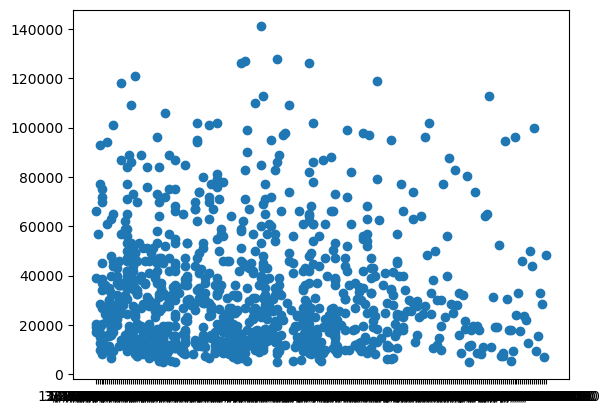

In [6]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])
plt.show()

One thing you might have noticed is that the `saledate` column value is being treated as a Python object (it's okay if you didn't notice, these things take practice).

When the `Dtype` is `object`, it's saying that it's a string.

Looks like the x-axis is quite crowded.

Maybe we can fix this by turning the `saledate` column into `datetime` format.

However, when we look at it...|

In [7]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

In [8]:
df.saledate.dtype

dtype('O')

Looks like our `SalePrice` column is already in `float64` format so we can view its distribution directly from the DataFrame using a histogram plot.

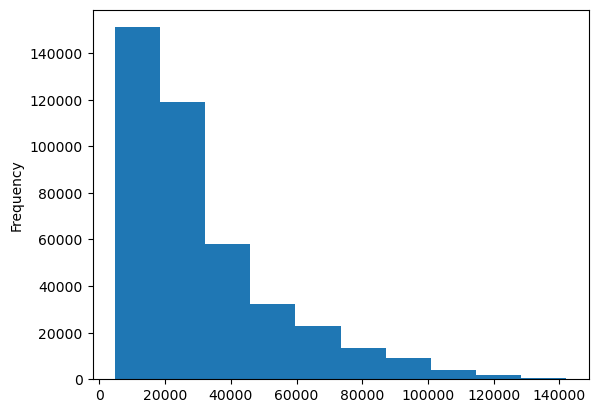

In [9]:
df.SalePrice.plot.hist()
plt.show()

### Parsing dates

When working with time series data, it's a good idea to make sure any date data is the format of a [datetime object](https://docs.python.org/3/library/datetime.html) (a Python data type which encodes specific information about dates).

We can tell pandas which columns to read in as dates by setting the `parse_dates` parameter in [`pd.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

Once we've imported our CSV with the `saledate` column parsed, we can view information about our DataFrame again with `df.info()`. 

In [10]:
# Import data again but this time parse dates
df = pd.read_csv("resources/TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=["saledate"])

# With parse_dates... check dtype of "saledate"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

Nice!

Looks like our `saledate` column is now of type [`datetime64[ns]`](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.datetime64), a NumPy-specific datetime format with high precision.

Since pandas works well with NumPy, we can keep it in this format.

In [11]:
# missing values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [12]:
df.saledate.dtype

dtype('<M8[ns]')

In numpy datetime64[ns] and <M8[ns] are equivalent

In [13]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

How about we view a few samples from our `SaleDate` column again?

In [14]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

That's looking much better already. 

We'll see how having our dates in this format is really helpful later on.

For now, how about we visualize our `saledate` column against our `SalePrice` column again?

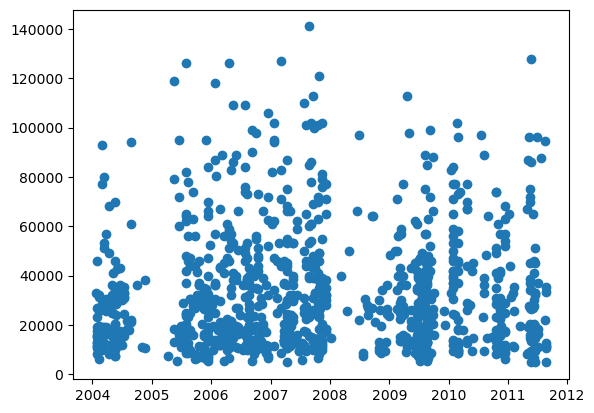

In [15]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])
plt.show()

In [16]:
# to view all columns
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# To transpose and view the columns as rows
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [18]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate

Now we've formatted our `saledate` column to be NumPy `datetime64[ns]` objects, we can use built-in pandas methods such as `sort_values` to sort our DataFrame by date.

And considering this is a time series problem, sorting our DataFrame by date has the added benefit of making sure our data is sequential.

In other words, we want to use examples from the past (example sale prices from previous dates) to try and predict future bulldozer sale prices. 

Let's use the [`pandas.DataFrame.sort_values`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) method to sort our DataFrame by `saledate` in ascending order.

In [19]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

Looks like our older samples are now coming first and the newer samples are towards the end of the DataFrame.

In [20]:
df.head(20)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
54653,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
81383,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
113390,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Make a copy of the original DataFrame
Since we're going to be manipulating the data, we'll make a copy of the original DataFrame and perform our changes there.

This will keep the original DataFrame in tact if we need it again.

In [21]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Add datetime parameters for saledate column

One way to potentially increase the predictive power of our data is to enhance it with more features.

This practice is known as [**feature engineering**](https://en.wikipedia.org/wiki/Feature_engineering), taking existing features and using them to create more/different features. 

There is no set in stone way to do feature engineering and often it takes quite a bit of practice/exploration/experimentation to figure out what might work and what won't.

For now, we'll use our `saledate` column to add extra features such as:

* Year of sale
* Month of sale
* Day of sale
* Day of week sale (e.g. Monday = 1, Tuesday = 2)
* Day of year sale (e.g. January 1st = 1, January 2nd = 2)

Because we imported the data using `read_csv()` and we asked pandas to parse the dates using `parase_dates=[\saledate\]`, we can now access the [different datetime attributes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) of the `saledate` column.

Let's use these attributes to add a series of different feature columns to our dataset. 

Lets test this our before we do the actual assignment

In [22]:
df_tmp[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int32

In [23]:
df_tmp[:1].saledate.dt.day

205615    17
Name: saledate, dtype: int32

In [24]:
# Now lets do the actual assignment and adding this to extra columns in our dataset
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [25]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


After we've added these extra columns, we can remove the original `saledate` column as its information will be dispersed across these new columns.

In [26]:
# Now we've enriched our DataFrame with date time features, we can remove 'saledate'
df_tmp.drop("saledate", axis=1, inplace=True)

We could add more of these style of columns, such as, whether it was the start or end of a quarter (the sale being at the end of a quarter may bye influenced by things such as quarterly budgets) but these will do for now.

> **Challenge:** See what other [datetime attributes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) you can add to `df_tmp` using a similar technique to what we've used above. Hint: check the bottom of the [`pandas.DatetimeIndex` docs](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html).

How about we view some of our newly created columns?

In [27]:
# View newly created columns
df_tmp[["SalePrice", "saleYear", "saleMonth", "saleDay", "saleDayOfWeek", "saleDayOfYear"]].head()

,SalePrice,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,9500.0,1989,1,17,1,17
274835,14000.0,1989,1,31,1,31
141296,50000.0,1989,1,31,1,31
212552,16000.0,1989,1,31,1,31
62755,22000.0,1989,1,31,1,31


Now we've broken our `saledate` column into columns/features, we can perform further exploratory analysis such as visualizing the `SalePrice` against the `saleMonth`.

How about we view the first 10,000 samples (we could also randomly select 10,000 samples too) to see if reveals anything about which month has the highest sales?

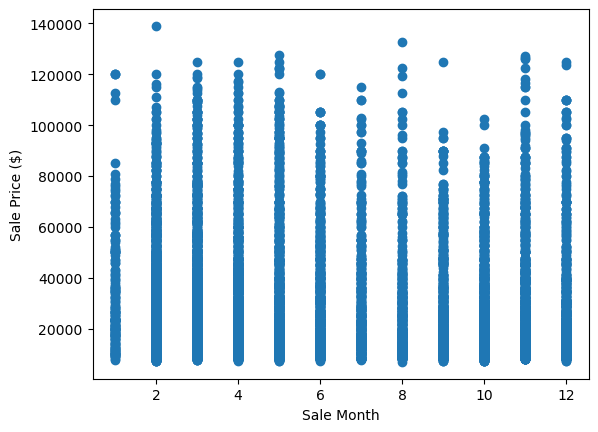

In [28]:
# View 10,000 samples SalePrice against saleMonth
fig, ax = plt.subplots()
ax.scatter(x=df_tmp["saleMonth"][:10000], # visualize the first 10000 values
           y=df_tmp["SalePrice"][:10000])
ax.set_xlabel("Sale Month")
ax.set_ylabel("Sale Price ($)");
plt.show()

Hmm... doesn't look like there's too much conclusive evidence here about which month has the highest sales value.

How about we plot the median sale price of each month?

We can do so by grouping on the `saleMonth` column with [`pandas.DataFrame.groupby`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) and then getting the median of the `SalePrice` column.

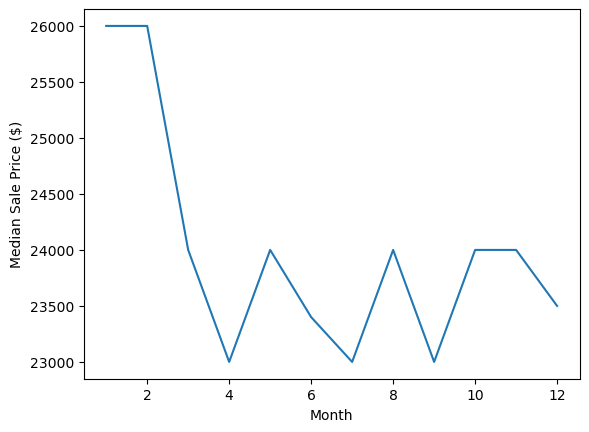

In [29]:
# Group DataFrame by saleMonth and then find the median SalePrice
df_tmp.groupby(["saleMonth"])["SalePrice"].median().plot()
plt.xlabel("Month")
plt.ylabel("Median Sale Price ($)");
plt.show()

Ohhh it looks like the median sale prices of January and February (months 1 and 2) are quite a bit higher than the other months of the year.

Could this be because of New Year budget spending?

Perhaps... but this would take a bit more investigation.

In the meantime, there are many other values we could look further into.

### Inspect values of other columns

When first exploring a new problem, it's often a good idea to become as familiar with the data as you can.

Of course, with a dataset that has over 400,000 samples, it's unlikely you'll ever get through every sample.

But that's where the power of data analysis and machine learning can help.

We can use pandas to aggregate thousands of samples into smaller more managable pieces.

And as we'll see later on, we can use machine learning models to model the data and then later inspect which features the model thought were most important.

How about we see which states sell the most bulldozers?

In [30]:
# Check the values of different columns
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

Looks like Flordia sells a fair few bulldozers.

How about we go even further and group our samples by `state` and then find the median `SalePrice` per state?

We also compare this to the median `SalePrice` for all samples.

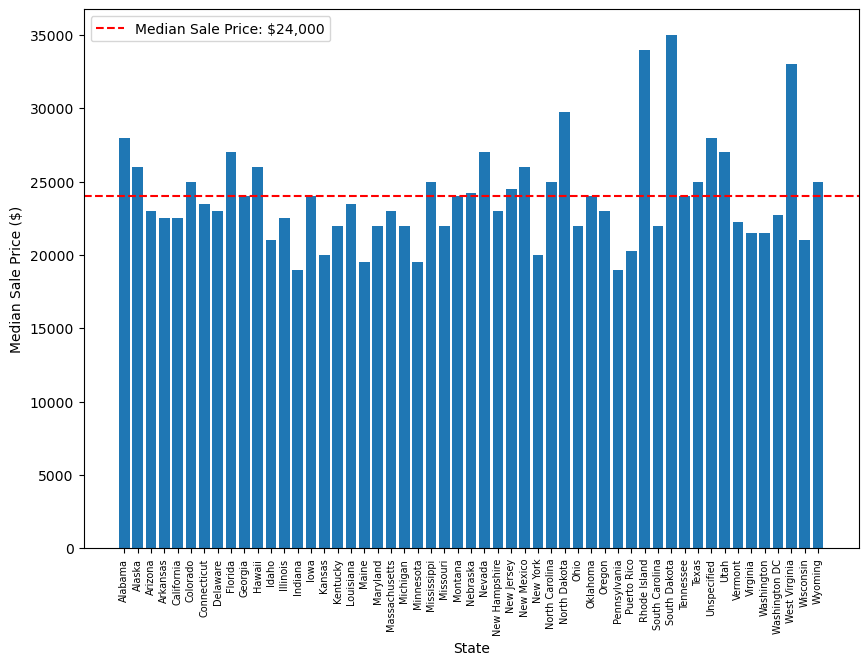

In [31]:
# Group DataFrame by saleMonth and then find the median SalePrice per state as well as across the whole dataset
median_prices_by_state = df_tmp.groupby(["state"])["SalePrice"].median() # this will return a pandas Series rather than a DataFrame
median_sale_price = df_tmp["SalePrice"].median()

# Create a plot comparing median sale price per state to median sale price overall
plt.figure(figsize=(10, 7))
plt.bar(x=median_prices_by_state.index, # Because we're working with a Series, we can use the index (state names) as the x values
        height=median_prices_by_state.values)
plt.xlabel("State")
plt.ylabel("Median Sale Price ($)")
plt.xticks(rotation=90, fontsize=7);
plt.axhline(y=median_sale_price, 
            color="red", 
            linestyle="--", 
            label=f"Median Sale Price: ${median_sale_price:,.0f}")
plt.legend();
plt.show()

Now that's a nice looking figure!

Interestingly Florida has the most sales and the median sale price is above the overall median of all other states.

And if you had a bulldozer and were chasing the highest sale price, the data would reveal that perhaps selling in South Dakota would be your best bet.

Perhaps bulldozers are in higher demand in South Dakota because of a building or mining boom?

Answering this would require a bit more research.

But what we're doing here is slowly building up a mental model of our data. 

So that if we saw an example in the future, we could compare its values to the ones we've already seen.

In [32]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [33]:
len(df_tmp)

412698

# 5. Modelling

We've performed a small Exploratory Data Analysis (EDA) as well as enriched it with some `datetime` attributes, now let's try to model it.

Why model so early?

Well, we know the evaluation metric (root mean squared log error or RMSLE) we're heading towards. 

We could spend more time doing EDA, finding more out about the data ourselves but what we'll do instead is use a machine learning model to help us do EDA whilst simultaneously working towards the best evaluation metric we can get. 

Remember, one of the biggest goals of starting any new machine learning project is reducing the time between experiments.

Following the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/machine_learning_map.html) and taking into account the fact we've got over 100,000 examples, we find a [`sklearn.linear_model.SGDRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) or a [`sklearn.ensemble.RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn-ensemble-randomforestregressor) model might be a good candidate.

Since we're worked with the Random Forest algorithm before (on the [heart disease classification problem](https://dev.mrdbourke.com/zero-to-mastery-ml/end-to-end-heart-disease-classification/)), let's try it out on our regression problem.

> **Note:** We're trying just one model here for now. But you can try many other kinds of models from the Scikit-Learn library, they mostly work with a similar API. There are even libraries such as [`LazyPredict`](https://github.com/shankarpandala/lazypredict) which will try many models simultaneously and return a table with the results.

In [34]:
# Let's build a machine learning model 
# random_state=42 is equivalent to setting np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

ValueError: could not convert string to float: 'Low'

When we try to fit our model to the data, we get a value error similar to:

> `ValueError: could not convert string to float: 'Low'`

The problem here is that some of the features of our data are in string format and machine learning models love numbers.

Not to mention some of our samples have missing values.

And typically, machine learning models require all data to be in numerical format as well as all missing values to be filled.

Let's start to fix this by inspecting the different datatypes in our DataFrame.

We can do so using the [`pandas.DataFrame.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) method, this will give us the different datatypes as well as how many non-null (a null value is generally a missing value) in our `df_tmp` DataFrame.

> **Note:** There are some ML models such as [`sklearn.ensemble.HistGradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html), [CatBoost](https://catboost.ai/) and [XGBoost](https://xgboost.ai/) which can handle missing values, however, I'll leave exploring each of these as extra-curriculum/extensions.

In [35]:
# Check for missing values and different datatypes 
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

Ok, it seems as though we've got a fair few different datatypes. 

There are `int64` types such as `MachineID`.

There are `float64` types such as `SalePrice`.

And there are `object` (the `object` dtype can hold any Python object, including strings) types such as `UseageBand`.

> **Resource:** You can see a list of all the [pandas dtypes in the pandas user guide](https://pandas.pydata.org/docs/user_guide/basics.html#dtypes).

In [36]:
df_tmp["UsageBand"].dtype

dtype('O')

How about we find out how many missing values are in each column?

We can do so using [`pandas.DataFrame.isna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) (`isna` stands for 'is null or NaN') which will return a boolean `True`/`False` if a value is missing (`True` if missing, `False` if not). 

Let's start by checking the missing values in the head of our DataFrame.

In [37]:
# Find missing values in the head of our DataFrame 
df_tmp.head().isna()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,False,False,False,False,False,False,False,True,True,False,...,False,False,False,True,True,False,False,False,False,False
274835,False,False,False,False,False,False,False,True,True,False,...,True,True,True,False,False,False,False,False,False,False
141296,False,False,False,False,False,False,False,True,True,False,...,False,False,False,True,True,False,False,False,False,False
212552,False,False,False,False,False,False,False,True,True,False,...,True,True,True,False,False,False,False,False,False,False
62755,False,False,False,False,False,False,False,True,True,False,...,False,False,False,True,True,False,False,False,False,False


Alright it seems as though we've got some missing values in the `MachineHoursCurrentMeter` as well as the `UsageBand` and a few other columns.

But so far we've only viewed the first few rows.

It'll be very time consuming to go through each row one by one so how about we get the total missing values per column?

We can do so by calling `.isna()` on the whole DataFrame and then chaining it together with `.sum()`.

Doing so will give us the total `True`/`False` values in a given column (when summing, `True` = 1, `False` = 0).

In [38]:
# Check for total missing values per column
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

It looks like our DataFrame has quite a few missing values.

Not to worry, we can work on fixing this later on.

How about we start by tring to turn all of our data in numbers?

### Convert String to Categories

One way to help turn all of our data into numbers is to convert the columns with the `object` datatype into a `category` datatype using [`pandas.CategoricalDtype`](https://pandas.pydata.org/docs/reference/api/pandas.CategoricalDtype.html).

> **Note:** There are many different ways to convert values into numbers. And often the best way will be specific to the value you're trying to convert. The method we're going to use, converting all objects (that are mostly strings) to categories is one of the faster methods as it makes a quick assumption that each unique value is its own number. 

We can check the different datatypes compatible with pandas here: https://pandas.pydata.org/pandas-docs/version/1.4/reference/general_utility_functions.html

In [39]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


We can check the datatype of an individual column using the `.dtype` attribute and we can get its full name using `.dtype.name`.

In [40]:
# Get the dtype of a given column
df_tmp["UsageBand"].dtype, df_tmp["UsageBand"].dtype.name

(dtype('O'), 'object')

Now we've got a way to check a column's datatype individually.

There's also another group of methods to check a column's datatype directly.

For example, using [`pd.api.types.is_object_dtype(arr_or_dtype)`](https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_object_dtype.html) we can get a boolean response as to whether the input is an object or not.

> **Note:** There are many more of these checks you can perform for other datatypes such as strings under a similar name space `pd.api.types.is_XYZ_dtype`. See the [pandas documentation](https://pandas.pydata.org/docs/reference/arrays.html) for more.

Let's see how it works on our `df_tmp["UsageBand"]` column.

In [41]:
# Check whether a column is an object
pd.api.types.is_object_dtype(df_tmp["UsageBand"])

True

We can also check whether a column is a string with `pd.api.types.is_string_dtype(arr_or_dtype)`.

In [42]:
# Check whether a column is a string
pd.api.types.is_string_dtype(df_tmp["state"])

True

We can even loop through the items (columns and their labels) in our DataFrame using [`pandas.DataFrame.items()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.items.html) (in Python dictionary terms, calling `.items()` on a DataFrame will treat the column names as the keys and the column values as the values) and print out samples of columns which have the `string` datatype.

As an extra check, passing the sample to [`pd.api.types.infer_dtype()`](https://pandas.pydata.org/docs/reference/api/pandas.api.types.infer_dtype.html) will return the datatype of the sample.

This will be a good way to keep exploring our data.

In [43]:
# Find the columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [44]:
# If you're wondering what df.items() does, here's an example
random_dict = {"key1": "hello",
               "key2": "world!"}

for key, value in random_dict.items():
    print(f"this is a key: {key}",
          f"this is a value: {value}")

this is a key: key1 this is a value: hello
this is a key: key2 this is a value: world!


In pandas, one way to convert object/string values to numerical values is to convert them to categories or more specifically, the `pd.CategoricalDtype` datatype.

This datatype keeps the underlying data the same (e.g. doesn't change the string) but enables easy conversion to a numeric code using [`.cat.codes`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.codes.html).

For example, the column `state` might have the values `'Alabama', 'Alaska', 'Arizona'...` and these could be mapped to numeric values `1, 2, 3...` respectively.

To see this in action, let's first convert the object datatype columns to `\category\` datatype.

We can do so by looping through the `.items()` of our DataFrame and reassigning each object datatype column using [`pandas.Series.astype(dtype="category")`](https://pandas.pydata.org/docs/reference/api/pandas.Series.astype.html).

In [45]:
# This will turn all of the string value into category values
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

Now let's check if it worked by calling `.info()` on our DataFrame.

In [46]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

All of the object datatype columns now have the category datatype.

We can inspect this on a single column using `pandas.Series.dtype`.

In [47]:
# Check the datatype of a single column
df_tmp.state.dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=True, categories_dtype=object)

Notice how the column is now of type `pd.CategoricalDtype`.

We can also access these categories using [`pandas.Series.cat.categories`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.categories.html).


In [48]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

Finally, we can get the category codes (the numeric values representing the category) using `pandas.Series.cat.codes`.

In [49]:
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

In [50]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

This gives us a numeric representation of our object/string datatype columns.

Thanks to pandas Categories we now have a way to access all of our data in the form of numbers.

But we still have a bunch of missing data...

In [51]:
# Check missing data
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save & load preprocessed data

Before we start doing any further preprocessing steps on our DataFrame, how about we save our current DataFrame to file so we could import it again later if necessary.

Saving and updating your dataset as you go is common practice in machine learning problems. As your problem changes and evolves, the dataset you're working with will likely change too.

Making checkpoints of your dataset is similar to making checkpoints of your code.

In [52]:
# Export current tmp dataframe
df_tmp.to_csv("resources/train_tmp.csv",
              index=False)

Now we've saved our preprocessed data to file, we can re-import it and make sure it's in the same format.

In [53]:
# Import preprocessed data
df_tmp = pd.read_csv("resources/train_tmp.csv",
                     low_memory=False)
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [54]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [55]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Fill missing values
### Fill numerical missing values first

As previously discussed, there are many ways to fill missing values.

For missing numeric values, some potential options are:

| **Method** | **Pros**  | **Cons** |
|-----|-----|-----|
| **Fill with mean of column** | - Easy to calculate/implement <br> - Retains overall data distribution | - Averages out variation <br> - Affected by outliers (e.g. if one value is much higher/lower than others) |
| **Fill with median of column** | - Easy to calculate/implement <br> - Robust to outliers <br> - Preserves center of data  | - Ignores data distribution shape |
| **Fill with mode of column** | - Easy to calculate/implement <br> - More useful for categorical-like data | - May not make sense for continuous/numerical data  |
| **Fill with 0 (or another constant)** | - Simple to implement <br> - Useful in certain contexts like counts  | - Introduces bias (e.g. if 0 was a value that meant something) <br> - Skews data (e.g. if many missing values, replacing all with 0 makes it look like that's the most common value)  |
| **Forward/Backward fill (use previous/future values to fill future/previous values)**  | - Maintains temporal continuity (for time series) | - Assumes data is continuous, which may not be valid |
| **Use a calculation from other columns** | - Takes existing information and reinterprets it | - Can result in unlikely outputs if calculations are not continuous | 
| **Interpolate  (e.g. like dragging a cell in Excel/Google Sheets)** | - Captures trends <br> - Suitable for ordered data | - Can introduce errors <br> - May assume linearity (data continues in a straight line) |
| **Drop missing values** | - Ensures complete data (only use samples with all information) <br> - Useful for small datasets | - Can result in data loss (e.g. if many missing values are scattered across columns, data size can be dramatically reduced) <br> - Reduces dataset size  |

Which method you choose will be dataset and problem dependant and will likely require several phases of experimentation to see what works and what doesn't.

In [56]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [57]:
# cannot check each column one by one like below
df_tmp.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [58]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


For now, we'll fill our missing numeric values with the median value of the target column.

We'll also add a binary column (0 or 1) with rows reflecting whether or not a value was missing.

For example, `MachineHoursCurrentMeter_is_missing` will be a column with rows which have a value of `0` if that row's `MachineHoursCurrentMeter` column was *not* missing and `1` if it was.

In [59]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

Why add a binary column indicating whether the data was missing or not?

We can easily fill all of the missing numeric values in our dataset with the median.

However, a numeric value may be missing for a reason.

Adding a binary column which indicates whether the value was missing or not helps to retain this information. It also means we can inspect these rows later on.

In [60]:
# Show rows where MachineHoursCurrentMeter_is_missing == 1
df_tmp[df_tmp["MachineHoursCurrentMeter_is_missing"] == 1].sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
273215,1777703,21000.0,1277195,16565,132,1.0,2005,0.0,NaN,PC35MR-2,...,NaN,NaN,NaN,2008,8,20,2,233,False,True
19175,1744106,14750.0,1467569,8988,132,10.0,1986,0.0,NaN,D31,...,None or Unspecified,NaN,NaN,1992,12,3,3,338,False,True
187403,1550892,85000.0,21898,1130,132,8.0,2001,0.0,NaN,315CL,...,NaN,NaN,NaN,2005,8,25,3,237,False,True
297367,1616728,42500.0,1482810,14296,132,1.0,2003,0.0,NaN,270CLC,...,NaN,NaN,NaN,2009,3,4,2,63,False,True
76001,1411823,26000.0,1479866,3546,132,6.0,1993,0.0,NaN,426B,...,NaN,NaN,NaN,1999,2,10,2,41,False,True


In [61]:
# Demonstrate how median is more robust than mean
# With outlier values median is more robust and will have less influence 
hundreds = np.full((1000,), 100)
hundreds_billion = np.append(hundreds, 1000000000)
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

(np.float64(100.0),
 np.float64(999100.8991008991),
 np.float64(100.0),
 np.float64(100.0))

How about we check again whether or not the numeric columns have missing values?

In [62]:
# Check if there's any null numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [63]:
# Check to see how many examples were missing
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [64]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and turning categorical variables into numbers

Now we've filled the numeric values, we'll do the same with the categorical values whilst ensuring that they are all numerical too.

Let's first investigate the columns which aren't numeric (we've already worked with these).

In [65]:
# Check for columns which aren't numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


Okay, we've got plenty of category type columns.

Let's now write some code to fill the missing categorical values as well as ensure they are numerical (non-string). 

To do so, we'll:

1. Create a blank column to category dictionary, we'll use this to store categorical value names (e.g. their string name) as well as their categorical code. We'll end with a dictionary of dictionaries in the form `{"column_name": {category_code: "category_value"...}...}`.
2. Loop through the items in the DataFrame.
3. Check if the column is numeric or not.
4. Add a binary column in the form `ORIGINAL_COLUMN_NAME_is_missing` with a `0` or `1` value for if the row had a missing value.
5. Ensure the column values are in the `pd.Categorical` datatype and get their category codes with `pd.Series.cat.codes` (we'll add `1` to these values since pandas defaults to assigning `-1` to `NaN` values, we'll use `0` instead).
6. Turn the column categories and column category codes from 5 into a dictionary with Python's [`dict(zip(category_names, category_codes))`](https://docs.python.org/3.3/library/functions.html#zip) and save this to the blank dictionary from 1 with the target column name as key.
7. Set the target column value to the numerical category values from 5.

That's a fair few steps but nothing we can't handle.

Let's do it!

In [66]:
# Checking the categorical codes of a column
pd.Categorical(df_tmp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], shape=(412698,), dtype=int8)

In [67]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes+1

No errors!

In [68]:
# Pandas assigns -1 for missing values, so we add plus 1 to make it zero in case of missing values
# by doing the below in the above code
pd.Categorical(df_tmp["state"]).codes+1

array([44,  9,  9, ...,  5,  5,  5], shape=(412698,), dtype=int8)

Let's check out a few random samples of our DataFrame.

In [69]:
df_tmp.sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
299705,1172485,21500.0,1059832,3406,121,3.0,1000,13624.0,3,324,...,False,False,False,False,False,True,True,True,True,True
101418,1448847,70000.0,1353164,3362,132,19.0,1993,0.0,0,107,...,True,True,True,True,True,True,True,True,True,True
30997,1602523,23000.0,1494515,4697,132,6.0,1983,0.0,0,982,...,True,True,True,True,True,True,True,True,False,False
376915,1275462,8000.0,1301869,3112,132,1.0,1996,8795.0,1,189,...,True,True,True,True,True,True,True,True,True,True
247251,1713055,12500.0,1544720,24764,132,2.0,1000,1107.0,2,1492,...,False,False,False,False,False,True,True,True,True,True


Looks like our data is all in numerical form.

In [70]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [71]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [72]:
# Also look's like no missing values
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

Now that all of data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model.

In [73]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [74]:
len(df_tmp)

412698

### Fitting a machine learning model to our preprocessed data

Now all of our data is numeric and there are no missing values, we should be able to fit a machine learning model to it!

Let's reinstantiate our trusty [`sklearn.ensemble.RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) model.

Since our dataset has a substantial amount of rows (~400k+), let's first make sure the model will work on a smaller sample of 1000 or so.

> **Note:** It's common practice on machine learning problems to see if your experiments will work on smaller scale problems (e.g. smaller amounts of data) before scaling them up to the full dataset. This practice enables you to try many different kinds of experiments with faster runtimes. The benefit of this is that you can figure out what doesn't work before spending more time on what does.

Our `X` values (features) will be every column except the `SalePrice` column.

And our `y` values (labels) will be the entirety of the `SalePrice` column.


We'll time how long our smaller experiment takes using the [magic function `%%time`](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html) and placing it at the top of the notebook cell.

> **Note:** You can find out more about the `%%time` magic command by typing `%%time?` (note the question mark on the end) in a notebook cell.

In [75]:
# %%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

# Fit the model
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [76]:
# Score the model
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9875468079970562

**Question**: Why doesn't the above metric hold water? (why isn't the metric reliable)

I think we've got an error... (you might've noticed it already)

Why might this metric be unreliable?

Hint: Compare the data we trained on versus the data we evaluated on.

### Splitting data into train/validation sets

In [77]:
df_tmp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [78]:
df_tmp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [79]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [80]:
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [81]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

In the previous few example we worked on filling the missing data in the training and validation data before splitting it into training and validation sets using the following code:

### Split data into training and validation  
df_val = df_tmp[df_tmp.saleYear == 2012]  
df_train = df_tmp[df_tmp.saleYear != 2012]  

The code worked but how might this interfere with our model?

Remember the goal of machine learning: use the past to predict the future.

So if our validation set is supposed to be representative of the future and we’re filling our training data using information from the validation set, what might this mean for our model?

The challenge here comes in two parts.
1. What does it mean if we fill our training data with information from the future (validation set)?
2. How might you implement a fix to the current way things are being done in the project?

If you need a hint, remember some takeaways from a previous lecture:
* Encode/transform all categorical variables of your data (on the entire dataset, this ensures categorical variables are encoded the same across training/test sets, if you can't do this, make sure the training and test sets have the same column names).
* Split your data (into train/test).
* Fill the training set and test set numerical values separately.
   * Don’t use numerical data from the future (test set) to fill data from the past (training set).

Keep these things in mind when we create a data preprocessing function in a lines of the example, they'll help you answer the question which gets raised then too.

### Building an evaluation function

Evaluating a machine learning model is just as important as training one.

And so because of this, let's create an evaluation function to make evaluation faster and reproducible.

According to Kaggle for the Bluebook for Bulldozers competition, [the evaluation function](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation) they use is root mean squared log error (RMSLE).

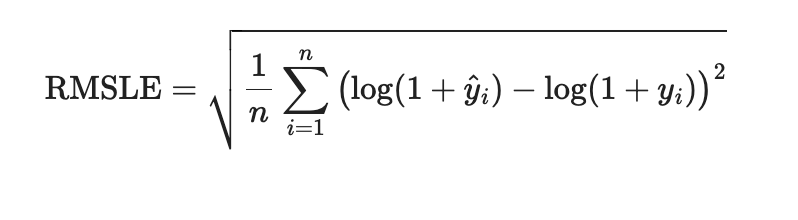

Where:

* $ \\hat{y}_i $ is the predicted value,  
* $ y_i $ is the actual value,  
* $ n $ is the number of observations.

Contrast this with mean absolute error (MAE), another common regression metric.

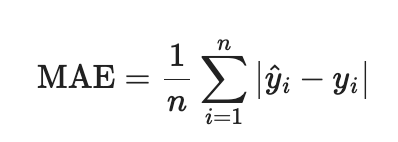

With RMSLE, the relative error is more meaningful than the absolute error. You care more about ratios than absolute errors. For example, being off by $100 on a $1000 prediction (10% error) is more significant than being off by $100 on a $10,000 prediction (1% error). RMSLE is sensitive to large percentage errors.

Where as with MAE, is more about exact differences, a $100 prediction error is weighted the same regardless of the actual value.

In each of case, a lower value (closer to 0) is better.

For any problem, it's important to define the evaluation metric you're going to try and improve on.

In our case, let's create a function that calculates multiple evaluation metrics.

Namely, we'll use:

* MAE (mean absolute error) via [`sklearn.metrics.mean_absolute_error`](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.mean_absolute_error.html) - lower is better.
* RMSLE (root mean squared log error) via [`sklearn.metrics.root_mean_squared_log_error`](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.root_mean_squared_log_error.html) - lower is better.
* $R^2$ (R-squared or coefficient of determination) via the [`score` method](https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.score) - higher is better.

For MAE and RMSLE we'll be comparing the model's predictions to the truth labels.

We can get an array of predicted values from our model using [`model.predict(X=features_to_predict_on)`](https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.predict). |

In [82]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

### Testing our model on a subset (to tune the hyperparameters)

Hyperparameters are the settings we can change on our model.

And tuning hyperparameters on a given model can often alter its performance on a given dataset.

Ideally, changing hyperparameters would lead to better results.

However, it's often hard to know what hyperparameter changes would improve a model ahead of time.

So what we can do is run several experiments across various different hyperparameter settings and record which lead to the best results.

In [83]:
# # This takes far too long... for experimenting

# %%time
# model = RandomForestRegressor(n_jobs=-1, 
#                               random_state=42)

# model.fit(X_train, y_train)

In [84]:
len(X_train)

401125

Making our modelling experiments faster (to speed up hyperparameter tuning)

Because of the size of our dataset (~400,000 rows), retraining an entire model (about 1-1.5 minutes on my MacBook Pro M1 Pro) for each new set of hyperparameters would take far too long to continuing experimenting as fast as we want to.

So what we'll do is take a sample of the training set and tune the hyperparameters on that before training a larger model.

> **Note:** If you're experiments are taking longer than 10-seconds (or far longer than what you can interact with), you should be trying to speed things up. You can speed experiments up by sampling less data, using a faster computer or using a smaller model.

We can take a artificial sample of the training set by altering the number of samples seen by each `n_estimator` (an `n_estimator` is a [decision tree](https://en.wikipedia.org/wiki/Decision_tree_learning) a random forest will create during training, more trees generally leads to better performance but sacrifices compute time) in [`sklearn.ensemble.RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) using the `max_samples` parameter.

For example, setting `max_samples` to 10,000 means every `n_estimator` (default 100) in our `RandomForestRegressor` will only see 10,000 random samples from our DataFrame instead of the entire ~400,000.

In other words, we'll be looking at 40x less samples which means we should get faster computation speeds but we should also  expect our results to worsen (because the model has less samples to learn patterns from).

Let's see if reducing the number samples speeds up our modelling time.

In [85]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [86]:
# Cutting down on the max number of samples each estimator can see improves training time
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


That worked much faster than training on the whole dataset.

In [87]:
# By setting max samples to 10000 we are going to evaluate the below number of samples
10000 * 100

1000000

In [88]:
# Diving these no of samples we will see how much time our model is faster 
(X_train.shape[0] * 100) / 1000000

40.1125

Let's evaluate our model with our `show_scores` function.

In [92]:
show_scores(model)

{'Training MAE': 5561.298809224058,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': np.float64(0.25774537825697696),
 'Valid RMSLE': np.float64(0.29362638671089003),
 'Training R^2': 0.8606658995199188,
 'Valid R^2': 0.8320374995090507}

Even though our new model saw far less data than the previous model, it still looks to be performing quite well.

With this faster model, we can start to run a series of different hyperparameter experiments.

### Hyerparameter tuning with RandomizedSearchCV

The goal of hyperparameter tuning is to values for our model's settings which lead to better results.

We could sit there and do this by hand, adjusting parameters on `sklearn.ensemble.RandomForestRegressor` such as `n_estimators`, `max_depth`, `min_samples_split` and more.

However, this would quite tedious.

Instead, we can define a dictionary of hyperparametmer settings in the form `{hyperparamter_name: [values_to_test]}` and then use [`sklearn.model_selection.RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#randomizedsearchcv) (randomly search for best combination of hyperparameters) or [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#gridsearchcv) (exhaustively search for best combination of hyperparameters) to go through all of these settings for us on a given model and dataset and then record which perform best.

A general workflow is to start with a large number and wide range of potential settings and use `RandomizedSearchCV` to search across these randomly for a limited number of iterations (e.g. `n_iter=10`).

And then take the best results and narrow the search space down before exhaustively search for the best hyperparameters with `GridSearchCV`.

Let's start trying to find better hyperparameters by:

1. Define a dictionary of hyperparameter values for our `RandomForestRegressor` model. We'll keep `max_samples=10000` so our experiments run faster.
2. Setup an instance of `RandomizedSearchCV` to explore the parameter values defined in step 1. We can adjust how many sets of hyperparameters our model tries using the `n_iter` parameter as well as how many times our model performs cross-validation using the `cv` parameter. For example, setting `n_iter=20` and `cv=3` means there will be 3 cross-validation folds for each of the 20 different combinations of hyperparameters, a total of 60 (3*20) experiments.
3. Fit the instance of `RandomizedSearchCV` to the data. This will automatically go through the defined number of iterations and record the results for each. The best model gets loaded at the end.

> **Note:** You can read more about the [tuning of hyperparameters of an estimator/model in the Scikit-Learn user guide](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator). 

In [93]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: user 22.6 s, sys: 3.08 s, total: 25.7 s
Wall time: 7.54 s


,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'max_depth': [None, 3, ...], 'max_features': [0.5, 1, ...], 'max_samples': [10000], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), ...}"
,n_iter,2
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [94]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': np.int64(40),
 'min_samples_split': np.int64(6),
 'min_samples_leaf': np.int64(5),
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': None}

In [95]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 7734.453688286478,
 'Valid MAE': 9214.980023878607,
 'Training RMSLE': np.float64(0.34177520519261806),
 'Valid RMSLE': np.float64(0.3736787978193633),
 'Training R^2': 0.7501906712949877,
 'Valid R^2': 0.74616252929307}

### Train a model with the best hyperparamters
**Note**: These were found after 100 iterations of `RandomizedSearchCV`.

Like all good machine learning cooking shows, we prepared a model earlier. 

We tried 100 different combinations of hyperparameters (setting `n_iter=100` in `RandomizedSearchCV`) and found the best results came from the settings below.

* `n_estimators=90`
* `max_depth=None`
* `min_samples_leaf=1`
* `min_samples_split=5`
* `max_features=0.5`
* `n_jobs=-1`
* `max_samples=None`

> **Note:** This search (`n_iter=100`) took ~2-hours on my MacBook Pro M1 Pro. So it's kind of a set and come back later experiment. That's one of the things you'll have to get used to as a machine learning engineer, figuring out what to do whilst your model trains. We like to go for long walks or to the gym (rule of thumb: while our model trains, we train).

We'll instantiate a new model with these discovered hyperparameters and reset the `max_samples` back to its original value.

In [125]:
%%time

# Create a model with best found hyperparameters 
# Note: There may be better values out there with longer searches but these are 
# the best I found with a ~2 hour search. A good challenge would be to see if you 
# can find better values.
ideal_model = RandomForestRegressor(n_estimators=90,
                                    max_depth=None,
                                    min_samples_leaf=1,
                                    min_samples_split=5,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)

# Fit a model to the preprocessed data
ideal_model.fit(X=X_train, 
                y=y_train)

CPU times: user 12min 55s, sys: 6.52 s, total: 13min 2s
Wall time: 59 s


,n_estimators,90
,criterion,'squared_error'
,max_depth,None
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


We can evaluate our ideal_model with our show_scores function.

In [126]:
%%time

# Evaluate ideal model
ideal_model_scores = show_scores(model=ideal_model)
ideal_model_scores

CPU times: user 28.1 s, sys: 1.04 s, total: 29.1 s
Wall time: 2.44 s


{'Training MAE': 1946.6732269642487,
 'Valid MAE': 5910.6954583183315,
 'Training RMSLE': np.float64(0.10146931726537829),
 'Valid RMSLE': np.float64(0.24489508412675942),
 'Training R^2': 0.9811730632618587,
 'Valid R^2': 0.8836268825720873}

With these new hyperparameters as well as using all the samples, we can see an improvement to our models performance.

One thing to keep in mind is that a larger model isn't always the best for a given problem even if it performs better.

For example, you may require a model that performs inference (makes predictions) very fast with a slight tradeoff to performance.

One way to a faster model is by altering some of the hyperparameters to create a smaller overall model. 

Particularly by lowering `n_estimators` since each increase in `n_estimators` is basically building another small model.

Let's half our `n_estimators` value and see how it goes.

In [127]:
%%time
# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: user 5min 22s, sys: 2.96 s, total: 5min 25s
Wall time: 26 s


,n_estimators,40
,criterion,'squared_error'
,max_depth,None
,min_samples_split,14
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Nice! The faster model fits to the training data in about half the time of the full model.

Now how does it go on performance?

In [128]:
# Scores for ideal_model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 2953.816113716348,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': np.float64(0.14469006962371855),
 'Valid RMSLE': np.float64(0.24524163989538328),
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450093}

In [98]:
# Scores on rs_model (only trained on ~10,000 examples)
show_scores(rs_model)

{'Training MAE': 7734.453688286478,
 'Valid MAE': 9214.980023878607,
 'Training RMSLE': np.float64(0.34177520519261806),
 'Valid RMSLE': np.float64(0.3736787978193633),
 'Training R^2': 0.7501906712949877,
 'Valid R^2': 0.74616252929307}

Looks like our faster model evaluates (performs inference/makes predictions) in about half the time too.

And only for a small tradeoff in validation RMSLE performance.

## Make predictions on test data

Now we've got a trained model saved and loaded, it's time to make predictions on the test data.

Our model is trained on data prior to 2011, however, the test data is from May 1 2012 to November 2012.

So what we're doing is trying to use the patterns our model has learned from the training data to predict the sale price of a bulldozer with characteristics it's never seen before but are assumed to be similar to that of those in the training data.

Let's load in the test data from `Test.csv`, we'll make sure to parse the dates of the `saledate` column.

In [100]:
# Import the test data
df_test = pd.read_csv("resources/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


You might notice that the `test_df` is missing the `SalePrice` column.

That's because that's the variable we're trying to predict based on all of the other variables.

We can make predictions with our `ideal_model` using the [`predict` method](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.predict).

In [101]:
# Make predictions on the test dataset
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...


We get an error:

> ValueError: The feature names should match those that were passed during fit.
> Feature names unseen at fit time:
> - saledate
> Feature names seen at fit time, yet now missing:
> - Backhoe_Mounting_is_missing
> - Blade_Extension_is_missing
> - Blade_Type_is_missing
> - Blade_Width_is_missing
> - Coupler_System_is_missing

The test data isn't in the same format of our other data, so we have to fix it. 

## Preprocessing the data (getting the test dataset in the same format as our training dataset)

Our model has been trained on data preprocessed in a certain way.

This means in order to make predictions on the test data, we need to take the same steps we used to preprocess the training data to preprocess the test data.

Remember, whatever you do to preprocess the training data, you have to do to the test data.

Let's recreate the steps we used for preprocessing the training data except this time we'll do it on the test data.

First, we'll add the extra date features to breakdown the `saledate` column.

In [103]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [104]:
# Process the test data 
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


Date features added!

Now can we make predictions with our model on the test data?

In [105]:
# Make predictions on updated test data
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing


Another error...

> ValueError: The feature names should match those that were passed during fit.

In [106]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [107]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

The reason for this to happen is on our training data, we dont have any `autioneer_ID` that has missing values

In [130]:
# Manually adjust df_test to have auctioneerID_is_missing column
df_test["auctioneerID_is_missing"] = False

# Reorder the column added to match train dataset
df_test = df_test[X_train.columns]
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


Finally now our test dataframe has the same features as our training dataframe, we can make predictions!

In [115]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

In [116]:
test_preds

array([17030.00927386, 14355.53565165, 46623.08774286, ...,
       11964.85073347, 16496.71079281, 27119.99044029], shape=(12457,))

We've made some predictions but they're not in the same format Kaggle is asking for: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

Namely, a DataFrame containing the SalesID and the predicted SalePrice of the bulldozer.

Let's make it.

In [117]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17030.009274
1,1227844,14355.535652
2,1227847,46623.087743
3,1227848,71680.261335
4,1227863,61762.999424
...,...,...
12452,6643171,39966.363007
12453,6643173,12049.704433
12454,6643184,11964.850733
12455,6643186,16496.710793


Excellent! We've got a `SalePrice` prediction for every `SalesID` in the test DataFrame.

Let's save this to CSV so we could upload it or share it with someone else if we had to.

In [118]:
# Export prediction data
df_preds.to_csv("resources/test_predictions.csv", index=False)

### Feature Importance
Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the **target variable** (SalePrice).

In our case, after our model learned the patterns in the data, which bulldozer sale attributes were most important for predicting its overall sale price?

We can do this for our `sklearn.ensemble.RandomForestRegressor` instance using the [`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_) attribute.

Let's check it out.

In [119]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

Looks like we get one value per feature in our dataset.

In [120]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

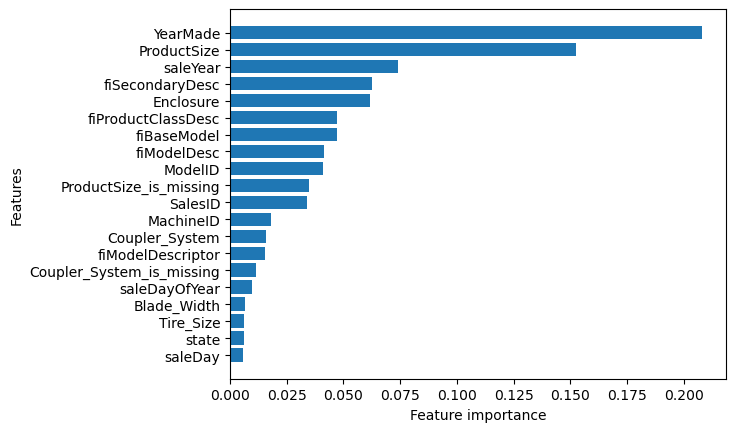

In [121]:
plot_features(X_train.columns, ideal_model.feature_importances_)
plt.show()

Ok, looks like the top 4 features contributing to our model's predictions are `YearMade`, `ProductSize`, `Enclosure` and `saleYear`.

Referring to the original [data dictionary](https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing), do these values make sense to be contributing the most to the model?

* `YearMade` - Year of manufacture of the machine.
* `ProductSize` - Size of the bulldozer.
* `Enclosure` - Type of bulldozer enclosure (e.g. OROPS = Open Rollover Protective Structures, EROPS = Enclosed Rollover Protective Structures).
* `saleYear` - The year the bulldozer was sold (this is one of our engineered features from `saledate`).
* `fiSecondaryDesc` - disaggregation of fiModelDesc

Now I've never sold a bulldozer but reading about each of these values seems to make sense that they would contribute significantly to the sale price.

I know when I've bought cars in the past, the year that is was made was an important part of my decision. 

And it also makes sense that `ProductSize` be an important feature when deciding on the price of a bulldozer.

Let's check out the unique values for `ProductSize` and `Enclosure`.

In [122]:
df["Enclosure"].value_counts()

Enclosure
OROPS                  177971
EROPS                  141769
EROPS w AC              92601
EROPS AC                   18
NO ROPS                     3
None or Unspecified         2
Name: count, dtype: int64

In [131]:
df["ProductSize"].value_counts()

ProductSize
Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: count, dtype: int64

My guess is that a bulldozer with a ProductSize of 'Mini' would sell for less than a bulldozer with a size of 'Large'.

We could investigate this further in an extension to model driven data exploratory analysis or we could take this information to a colleague or client to discuss further.

Either way, we've now got a machine learning model capable of predicting the sale price of bulldozers given their features/attributes!

That's a huuuuuuge effort!

And you should be very proud of yourself for making it this far.

## Summary

We've covered a lot of ground.

But there are some main takeaways to go over.

* **Every machine learning problem is different** - Since machine learning is such a widespread technology, it can be used for a multitude of different problems. In saying this, there will often be many different ways to approach a problem. In this example, we've focused on predicting a number, which is a regression problem. And since our data had a time component, it could also be considered a time series problem.
* **The machine learner's motto: Experiment, experiment, experiment!** - Since there are many different ways to approach machine learning problems, one of the best habits you can develop is an experimental mindset. That means not being afraid to try new things over and over. Because the more things you try, the quicker you can figure what doesn't work and the quicker you can start to move towards what does.
* **Always keep the test set separate** - If you can't evaluate your model on unseen data, how would you know how it will perform in the real world on future unseen data? Of course, using a test set isn't a perfect replica of the real world but if it's done right, it can give you a good idea. Because evaluating a model is just as important as training a model.
* **If you've trained a model on a data in a certain format, you'll have to make predictions in the same format** - Any preprocessing you do to the training dataset, you'll have to do to the validation, test and custom data. Any computed values should happen on the training set only and then be used to update any subsequent datasets.

**Question to finish:** Why might knowing the feature importances of a trained machine learning model be helpful?

**Final challenge/extension:** What other machine learning models could you try on our dataset?  
**Hint:** https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html check out the regression section of this map, or try to look at something like CatBoost.ai or XGBooost.ai.